<a href="https://colab.research.google.com/github/Akshay4729/Classification-ML-Models/blob/main/Diadetes_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_excel('/content/diabetes.xlsx')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df=df.rename(columns={'Outcome':'Defaulter'})

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Defaulter
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Exploratory Data Analysis**

In [11]:
fig1 = px.histogram(df, x = 'Pregnancies', marginal = 'box',
                    title = 'Distribution of Pregnancies',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig1.show()

In [12]:
fig2 = px.histogram(df, x = 'Glucose', marginal = 'box',
                    title = 'Distribution of Glucose',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig2.show()

In [13]:
fig3 = px.histogram(df, x = 'BloodPressure', marginal = 'box',
                    title = 'Distribution of Blood Pressure',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig3.show()

In [14]:
fig4 = px.histogram(df, x = 'SkinThickness', marginal = 'box',
                    title = 'Distribution of Skin Thickness',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig4.show()

In [15]:
fig5 = px.histogram(df, x = 'Insulin', marginal = 'box',
                    title = 'Distribution of Insulin',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig5.show()

In [16]:
fig6 = px.histogram(df, x = 'BMI', marginal = 'box',
                    title = 'Distribution of BMI',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig6.show()

In [17]:
fig7 = px.histogram(df, x = 'DiabetesPedigreeFunction', marginal = 'box',
                    title = 'Distribution of Diabetes Pedigree Function',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig7.show()

In [18]:
fig8 = px.histogram(df, x = 'Age', marginal = 'box',
                    title = 'Distribution of Age',
                   color_discrete_sequence=px.colors.qualitative.Antique)
fig8.show()

# **Box Plot And Outliers**

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Defaulter
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


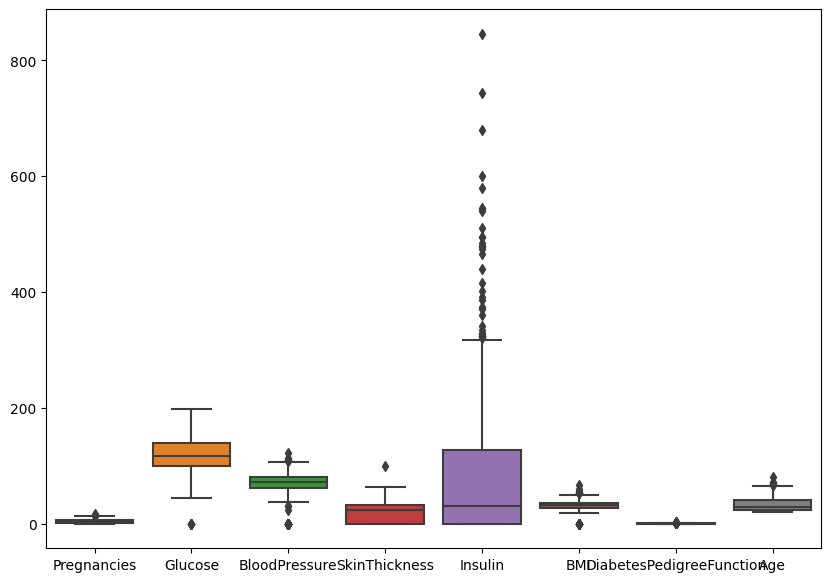

In [20]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.show()

In [21]:
num_var = df.select_dtypes(exclude='object')
for i in num_var:

    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of Pregnancies =  5.0
UL of Pregnancies =  13.5
LL of Pregnancies =  -6.5
Number of Outliers in Pregnancies  =  4
 
IQR of Glucose =  41.25
UL of Glucose =  202.125
LL of Glucose =  37.125
Number of Outliers in Glucose  =  5
 
IQR of BloodPressure =  18.0
UL of BloodPressure =  107.0
LL of BloodPressure =  35.0
Number of Outliers in BloodPressure  =  45
 
IQR of SkinThickness =  32.0
UL of SkinThickness =  80.0
LL of SkinThickness =  -48.0
Number of Outliers in SkinThickness  =  1
 
IQR of Insulin =  127.25
UL of Insulin =  318.125
LL of Insulin =  -190.875
Number of Outliers in Insulin  =  34
 
IQR of BMI =  9.3
UL of BMI =  50.550000000000004
LL of BMI =  13.35
Number of Outliers in BMI  =  19
 
IQR of DiabetesPedigreeFunction =  0.38249999999999995
UL of DiabetesPedigreeFunction =  1.2
LL of DiabetesPedigreeFunction =  -0.32999999999999996
Number of Outliers in DiabetesPedigreeFunction  =  29
 
IQR of Age =  17.0
UL of Age =  66.5
LL of Age =  -1.5
Number of Outliers in Age  =  

# **Distribution Plot**

In [22]:
mi0 = df[df['Defaulter']==0]
mi1 = df[df['Defaulter']==1]

In [23]:
con_col=[ ]

In [24]:
for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(mi0[i],color='g')
    sns.distplot(mi1[i],color='r')
    plt.show()

# **Correlation**

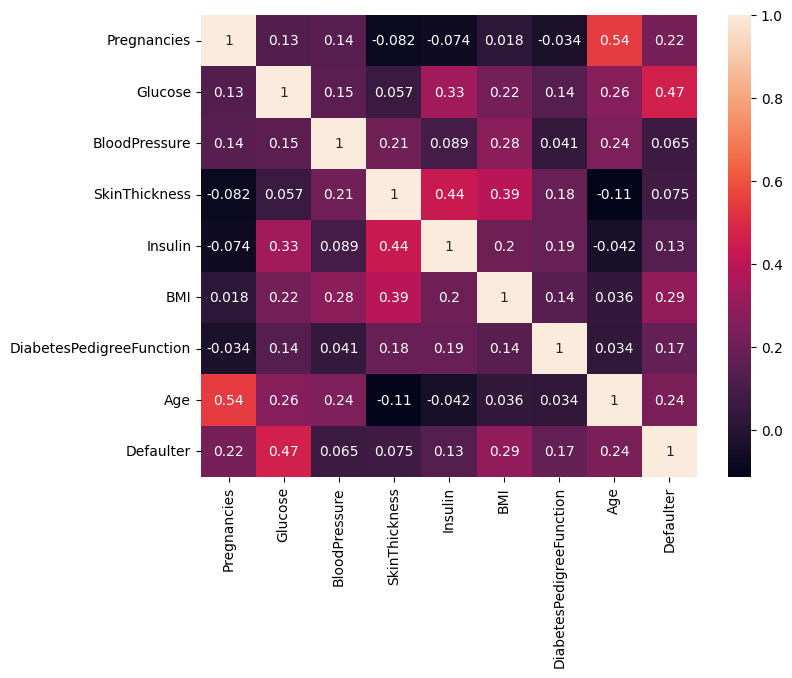

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# **Logistic Regression**

In [26]:
x = df.drop('Defaulter',axis=1)
y = df['Defaulter']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [28]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

Before OverSampling, the shape of train_X: (537, 8)
Before OverSampling, the shape of train_y: (537,) 



**Using** **Smote**

In [29]:
smote = SMOTE(sampling_strategy='minority')
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [30]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

After OverSampling, the shape of train_X: (708, 8)
After OverSampling, the shape of train_y: (708,) 



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(random_state = 42)
logistic.fit(x_train_sm, y_train_sm)
y_pred = logistic.predict(x_test)
acc_1=accuracy_score(y_test, y_pred)
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)
print(accuracy1)

Confusion Matrix : 
 [[120  26]
 [ 22  63]]
79.22


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [32]:
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       146
           1       0.71      0.74      0.72        85

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of logistic regression is 79.22%


# **Decision tree**

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_sm,y_train_sm)
y_pred4 = decision_tree.predict(x_test)
acc_4 = accuracy_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       146
           1       0.71      0.74      0.72        85

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of Decision tree is 72.73%


In [37]:
humidity_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [38]:
y_predicted = humidity_classifier.predict(x_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

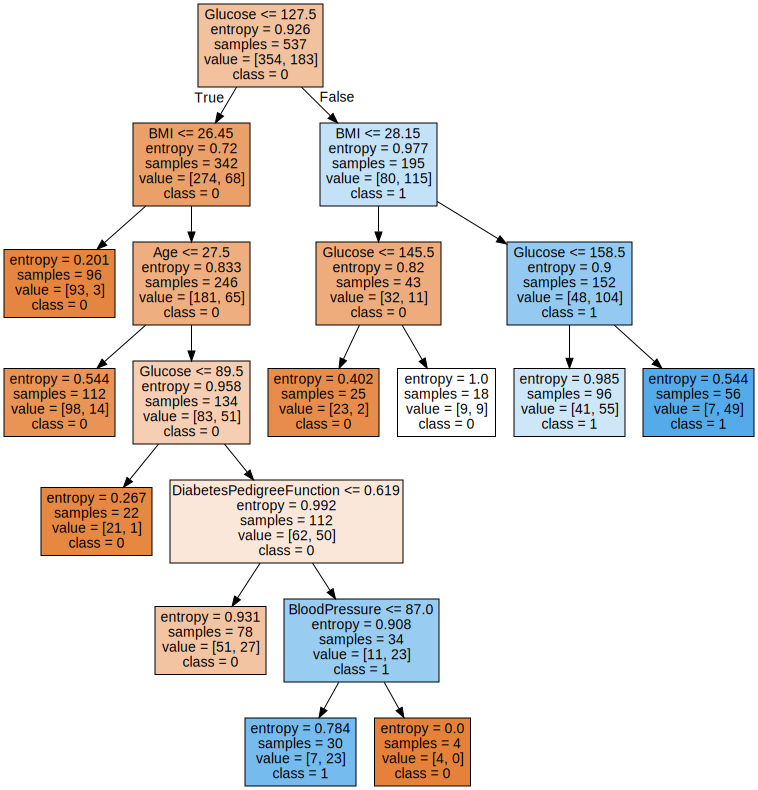

In [42]:
graph = Source(tree.export_graphviz(humidity_classifier, out_file=None
   , feature_names=x_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# **KNN**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(x_train_sm,y_train_sm)
y_pred2 = k_neighbors.predict(x_test)
acc_2 = accuracy_score(y_test, y_pred2)
accuracy2=round(acc_2*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of k nearest neighbors is {}%'.format(accuracy2))


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       146
           1       0.71      0.74      0.72        85

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of k nearest neighbors is 71.86%


# **Randon Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(x_train_sm, y_train_sm)

ran = random_forest.predict(x_train)

y_pred5 = random_forest.predict(x_test)
acc_5 = accuracy_score(y_test, y_pred5)
score5 = round(acc_5*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score5))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       146
           1       0.71      0.74      0.72        85

    accuracy                           0.79       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.79      0.79      0.79       231

The accuracy score of random forest is 80.95%
